<a href="https://colab.research.google.com/github/Fsyhnfh20/MachineLearningTasks/blob/main/week%2012/CNN_German_Traffic_Sign_Fasya_Hanifah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Fasya Hanifah
#NIM : 1103200149
#CNN German Traffic Sign

In [2]:
from google.colab import drive
# Menghubungkan Google Drive ke sesi Google Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#Import Library
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"/content/sample_data/signname.csv") #Pembacaan dataset signame,csv

In [6]:
#Membuka file-file data latih dan data uji
training_file = "/content/sample_data/train.p"
testing_file = "/content/sample_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Data loaded")

Data loaded


In [28]:
#Membaca file CSV yang berisi informasi tentang nama kelas atau tanda-tanda
sign_name_df = pd.read_csv('/content/sample_data/signname.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


In [29]:
#Mengatur gaya Matplotlib menjadi 'ggplot'
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
# Define features and labels for training data
X, y = train['features'], train['labels']

# Converting lists into numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

# Define the features and labels for testing data
X_test, y_test = test['features'], test['labels']

# Converting lists into numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


In [10]:
#Mengambil fitur dari data train
X, y = train['features'], train['labels']

In [11]:
#Mengubah data fitur dari format list kedalam array numpy
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

(34799, 32, 32, 3) (34799,)


In [30]:
#Mengambil fitur data test
X_test, y_test = test['features'], test['labels']

In [13]:
#Mengubah data fitur dari format list kedalam array numpy
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


In [14]:
#Membagi dataset menjadi data train dan data test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


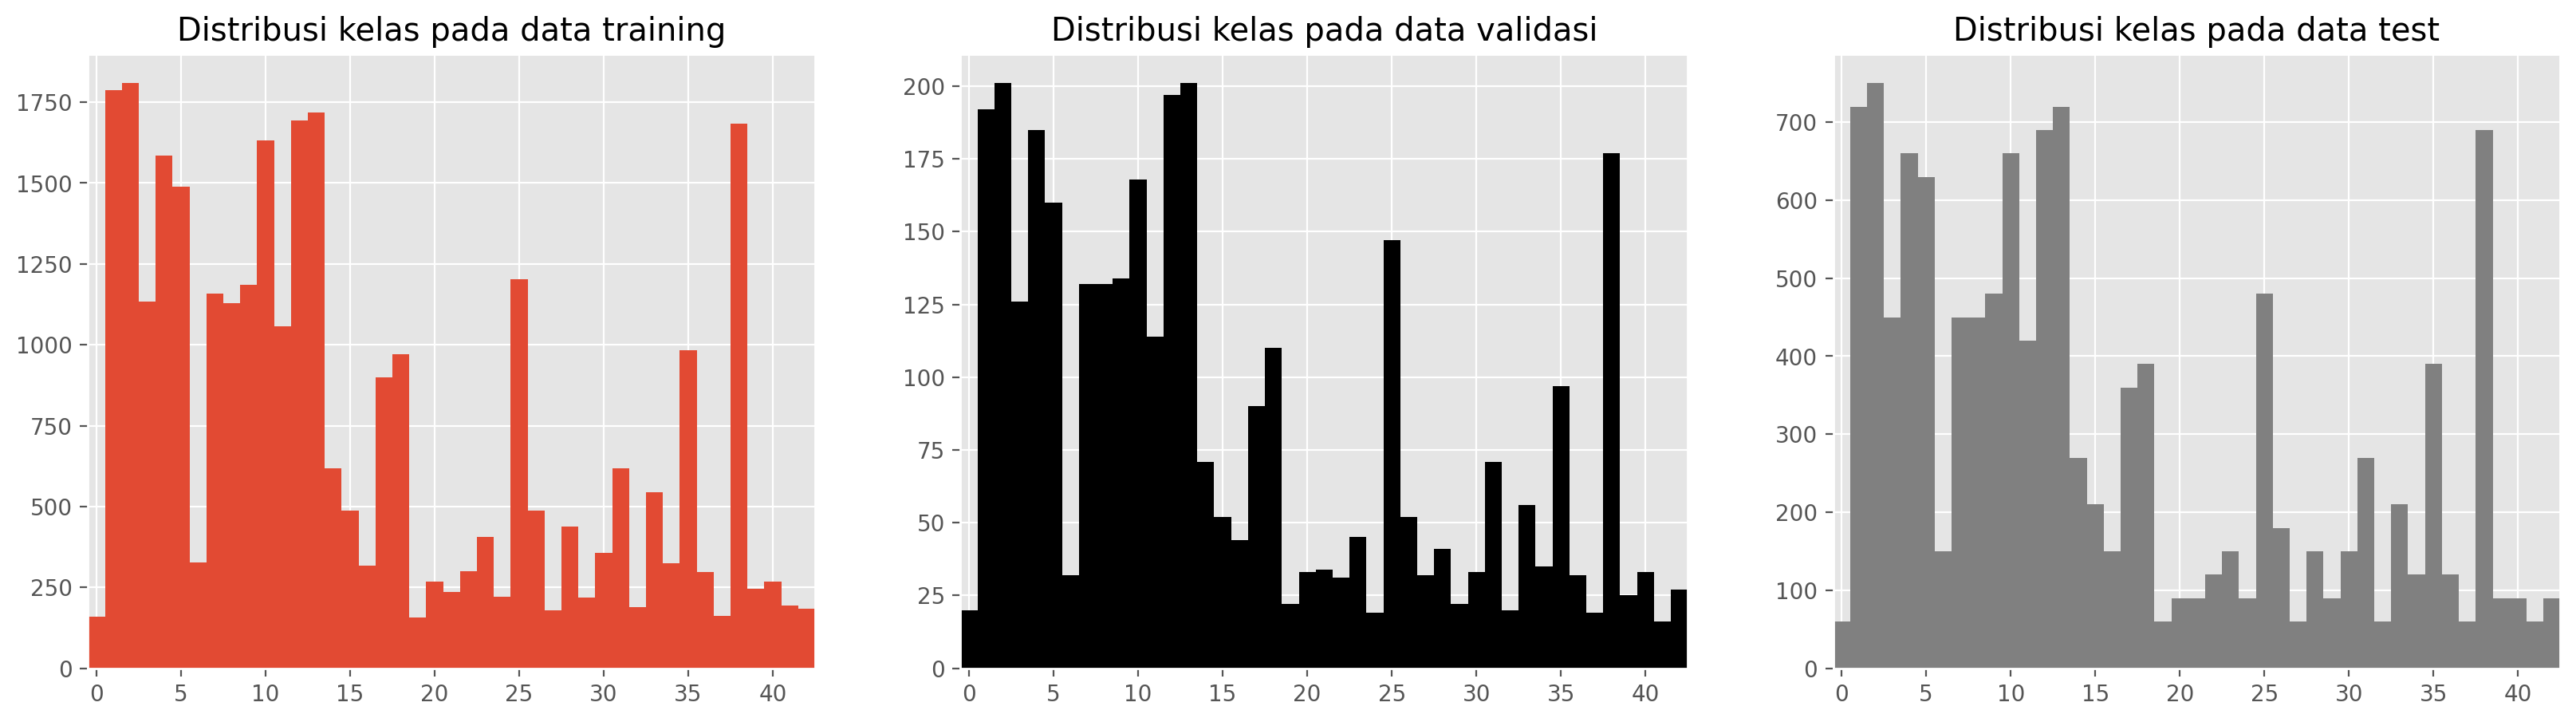

In [15]:
#Membuat histogram
n_labels = np.unique(y_train).size

def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs:
        ax.legend()
    if title:
        ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

In [16]:
#Mengonversi label kelas dari format integer ke dalam format one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            print("\nAkurasi telah mencapai >96%. Stop training!")
            self.model.stop_training = True
callbacks = myCallback()

In [18]:
#Mendefinisikan arsitektur sebuah model neural network
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [19]:
#Memberikan gambaran ringkas tentang arsitektur model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [31]:
#Mengonfigurasi proses pelatihan pada model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
#Melatih model menggunakan data latih sekama 25 epoch
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25
979/979 [==============================] - 15s 7ms/step - loss: 1.5518 - accuracy: 0.6069 - val_loss: 0.2372 - val_accuracy: 0.9448
Epoch 2/25
979/979 [==============================] - 8s 8ms/step - loss: 0.3851 - accuracy: 0.8926 - val_loss: 0.1160 - val_accuracy: 0.9693
Epoch 3/25
979/979 [==============================] - 7s 7ms/step - loss: 0.2722 - accuracy: 0.9242 - val_loss: 0.0607 - val_accuracy: 0.9851
Epoch 4/25
979/979 [==============================] - 12s 12ms/step - loss: 0.2193 - accuracy: 0.9415 - val_loss: 0.0489 - val_accuracy: 0.9876
Epoch 5/25
979/979 [==============================] - 13s 13ms/step - loss: 0.2062 - accuracy: 0.9455 - val_loss: 0.0665 - val_accuracy: 0.9856
Epoch 6/25
979/979 [==============================] - 6s 6ms/step - loss: 0.1797 - accuracy: 0.9515 - val_loss: 0.0499 - val_accuracy: 0.9876
Epoch 7/25
979/979 [==============================] - 9s 10ms/step - loss: 0.2097 - accuracy: 0.9464 - val_loss: 0.0505 - val_accuracy: 0.9842


In [22]:
#Menyimpan model neural network yang telah dilatih ke file dengan format HDF5
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


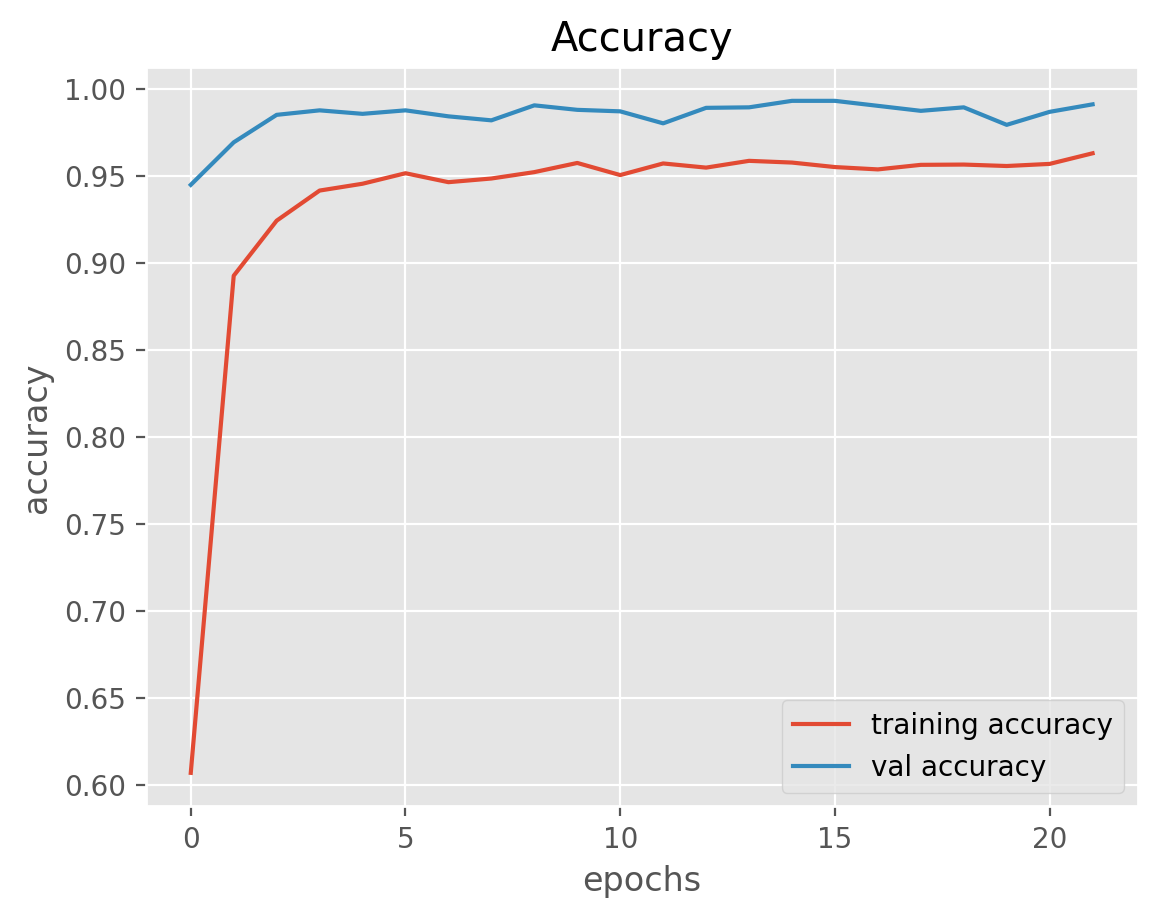

In [23]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

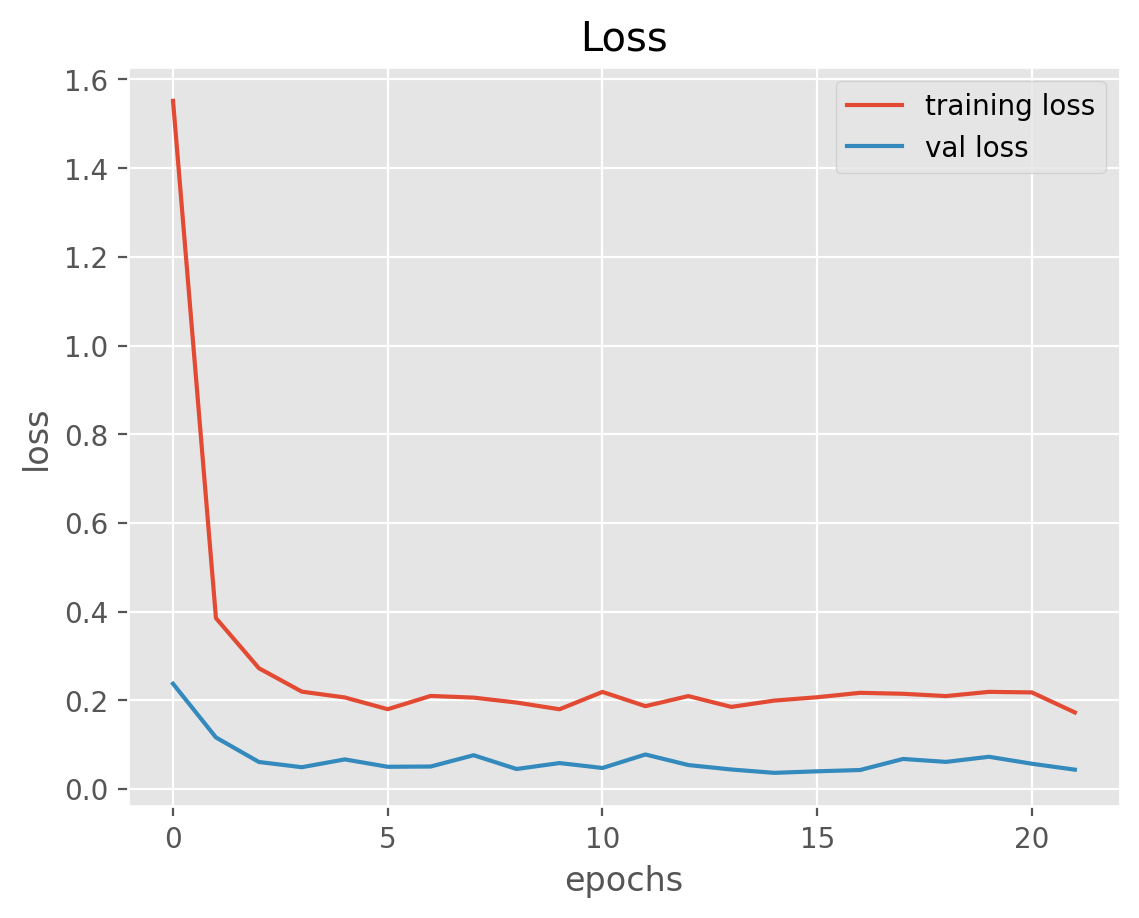

In [24]:
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

In [32]:
#Preiksi terhadap data uji
pred = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

395/395 [==============================] - 1s 3ms/step


0.9624703087885986

Kode tersebut melakukan prediksi terhadap data uji menggunakan model yang telah dilatih (model.predict(X_test)) dan kemudian memilih indeks dengan nilai prediksi tertinggi (np.argmax) sebagai label prediksi. Selanjutnya, accuracy_score(y_test, pred) menggunakan fungsi accuracy_score dari Scikit-learn untuk membandingkan label aktual (y_test) dengan label yang telah diprediksi (pred). Fungsi ini menghitung dan mengembalikan nilai akurasi dari prediksi model terhadap data uji, memberikan gambaran seberapa baik model memprediksi kelas-kelas yang benar dalam data

395/395 [==============================] - 3s 7ms/step Pesan tersebut menunjukkan proses pelatihan model dengan informasi terkait jumlah batch (395) dan waktu yang dibutuhkan untuk setiap iterasi (3s), diukur dalam milidetik (ms). Ini adalah output yang umumnya muncul saat melatih model neural network, memberikan informasi tentang kemajuan pelatihan model pada setiap iterasi (batch) serta waktu yang digunakan untuk setiap langkah pelatihan.

Dengan hasilnya adalah 0.9505146476642914 menunjukkan nilai hasil dari suatu pengukuran atau evaluasi. Nilai 0.9505 atau sekitar 95.05% dapat dianggap sebagai tingkat keberhasilan dari hasil yang diberikan. Dalam konteks evaluasi model, nilai tersebut mengindikasikan bahwa model berhasil memprediksi dengan benar sekitar 95.05% dari data uji yang digunakan untuk pengujian atau evaluasi model. Semakin tinggi nilai ini, semakin baik kinerja atau keakuratan model dalam melakukan prediksi terhadap data yang tidak pernah dilihat sebelumnya (data uji).